In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute, roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table

In [8]:
#Load and define data columns names
train3=pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\train_FD003.txt', delim_whitespace=True, header=None)
num_columns = train3.shape[1]
columns = ['unit', 'time', 'op1', 'op2', 'op3'] + [f'sr{i+1}' for i in range(num_columns - 5)]
train3.columns = columns

#Calculate RUL 
train3['max_time'] = train3.groupby('unit')['time'].transform('max')
train3['remaining_time'] = train3['max_time'] - train3['time']
train3['label'] = train3['remaining_time'].clip(upper=130)
train3.head()

C:\Users\65962\AppData\Local\Temp\ipykernel_23128\202389296.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train3=pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\train_FD003.txt', delim_whitespace=True, header=None)


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8.4246,0.03,391,2388,100.0,39.11,23.3537,259,258,130
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8.4403,0.03,392,2388,100.0,38.99,23.4491,259,257,130
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8.3901,0.03,391,2388,100.0,38.85,23.3669,259,256,130
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8.3878,0.03,392,2388,100.0,38.96,23.2951,259,255,130
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8.3869,0.03,392,2388,100.0,39.14,23.4583,259,254,130


In [9]:
#Roll time series data 
window_size=40
rolled_df = roll_time_series(train3,
                             column_id='unit',
                             column_sort='time',
                             max_timeshift=window_size - 1,
                             min_timeshift=window_size - 1,
                             rolling_direction=1)

Rolling: 100%|█████████████████████████████████████████████████████████████████████████| 38/38 [00:05<00:00,  6.69it/s]


In [16]:
#Select columns
selected_cols = ['id', 'op1', 'op2', 'op3', 'sr2', 'sr3', 'sr4', 'sr7', 'sr8', 'sr9', 'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr17', 'sr20', 'sr21']
selected_df = rolled_df[selected_cols]
selected_df

,id,op1,op2,op3,sr2,sr3,sr4,sr7,sr8,sr9,sr11,sr12,sr13,sr14,sr15,sr17,sr20,sr21
0,"(1, 40)",-0.0005,0.0004,100.0,642.36,1583.23,1396.84,553.97,2387.96,9062.17,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537
1,"(1, 40)",0.0008,-0.0003,100.0,642.50,1584.69,1396.89,554.55,2388.00,9061.78,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491
2,"(1, 40)",-0.0014,-0.0002,100.0,642.18,1582.35,1405.61,554.43,2388.03,9070.23,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669
3,"(1, 40)",-0.0020,0.0001,100.0,642.92,1585.61,1392.27,555.21,2388.00,9064.57,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951
4,"(1, 40)",0.0016,0.0000,100.0,641.68,1588.63,1397.65,554.74,2388.04,9076.14,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451515,"(100, 152)",-0.0016,-0.0003,100.0,643.78,1596.01,1424.11,551.86,2388.25,9070.82,48.27,519.66,2388.30,8138.08,8.5036,394,38.44,22.9631
451516,"(100, 152)",0.0034,-0.0003,100.0,643.29,1596.38,1429.14,551.86,2388.23,9064.60,48.13,519.91,2388.28,8144.36,8.5174,395,38.50,22.9746
451517,"(100, 152)",-0.0016,0.0004,100.0,643.84,1604.53,1431.41,551.30,2388.25,9063.45,48.18,519.44,2388.24,8135.95,8.5223,396,38.39,23.0682
451518,"(100, 152)",-0.0023,0.0004,100.0,643.94,1597.56,1426.57,550.69,2388.26,9062.22,48.05,520.01,2388.26,8141.24,8.5148,395,38.31,23.0753


In [17]:
#Extract Features 

from tsfresh.feature_extraction import EfficientFCParameters

efficient_params = EfficientFCParameters()

def batch_feature_extraction(df, batch_size=100):
    feature_batches = []
    for i in range(0, len(df['id'].unique()), batch_size):
        batch_df = df[df['id'].isin(df['id'].unique()[i:i + batch_size])]
        X_batch = extract_features(batch_df,
                                   column_id='id',
                                   default_fc_parameters=efficient_params,
                                   impute_function=impute)
        feature_batches.append(X_batch)
    return pd.concat(feature_batches)

X3= batch_feature_extraction(selected_df, batch_size=100)
X3.head()


Feature Extraction: 100%|███████████████████████████| 38/38 [00:05<00:00,  6.71it/s]


op1__variance_larger_than_standard_deviation  op1__has_duplicate_max  \
1 40                                           0.0                     0.0   
  41                                           0.0                     0.0   
  42                                           0.0                     0.0   
  43                                           0.0                     0.0   
  44                                           0.0                     0.0   

      op1__has_duplicate_min  op1__has_duplicate  op1__sum_values  \
1 40                     0.0                 1.0          -0.0159   
  41                     0.0                 1.0          -0.0168   
  42                     0.0                 1.0          -0.0158   
  43                     0.0                 1.0          -0.0135   
  44                     0.0                 1.0          -0.0095   

      op1__abs_energy  op1__mean_abs_change  op1__mean_change  \
1 40         0.000309              0.003364          0.000031   
  41         0.000310              0.003385         -0.000056   
  42         0.000313              0.003410          0.000082   
  43         0.000312              0.003418          0.000074   
  44         0.000312              0.003354          0.000010   

      op1__mean_second_derivative_central  op1__median  ...  \
1 40                            -0.000093     -0.00055  ...   
  41                             0.000001     -0.00065  ...   
  42                             0.000050     -0.00065  ...   
  43                            -0.000059     -0.00050  ...   
  44                             0.000021     -0.00015  ...   

      sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
1 40                       1.175362                        1.617983   
  41                       1.112645                        1.632021   
  42                       1.007483                        1.502136   
  43                       1.007483                        1.502136   
  44                       1.007483                        1.549826   

      sr21__fourier_entropy__bins_100  \
1 40                         2.755550   
  41                         2.623522   
  42                         2.846480   
  43                         2.780466   
  44                         2.912494   

      sr21__permutation_entropy__dimension_3__tau_1  \
1 40                                       1.784628   
  41                                       1.780221   
  42                                       1.784628   
  43                                       1.784628   
  44                                       1.780221   

      sr21__permutation_entropy__dimension_4__tau_1  \
1 40                                       2.978197   
  41                                       2.940730   
  42                                       2.940730   
  43                                       2.940730   
  44                                       2.940730   

      sr21__permutation_entropy__dimension_5__tau_1  \
1 40                                       3.545011   
  41                                       3.506503   
  42                                       3.506503   
  43                                       3.506503   
  44                                       3.506503   

      sr21__permutation_entropy__dimension_6__tau_1  \
1 40                                       3.555348   
  41                                       3.555348   
  42                                       3.555348   
  43                                       3.555348   
  44                                       3.555348   

      sr21__permutation_entropy__dimension_7__tau_1  \
1 40                                       3.526361   
  41                                       3.526361   
  42                                       3.526361   
  43                                       3.526361   
  44                                       3.526361   

      sr21__query_simil

In [19]:
#Select relevant features 
y= rolled_df.groupby('id')['label'].last()
X_filtered= select_features(X3,y)


In [20]:
#Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled= scaler.transform(X_filtered)
relevant_features_scaled_df= pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)


In [53]:
# Train model
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

# Train the XGBoost model (ADDITIONAL REGULARISATION TO PREVENT OVERFITTING)
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)  
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [54]:
# Predict and evaluate
y_pred= xgb_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse** 0.5
print(rmse)

5.140879543789906


In [23]:
#Load test data 
test3 = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\test_FD003.txt', delim_whitespace=True, header=None)
test3.columns = columns
test3

C:\Users\65962\AppData\Local\Temp\ipykernel_23128\1475024427.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test3 = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\test_FD003.txt', delim_whitespace=True, header=None)


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,529.23,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,529.27,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,529.48,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,529.39,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687


In [25]:
#Roll time series 
rolled_test= roll_time_series(test3,
                              column_id='unit',
                              column_sort='time',
                              max_timeshift=window_size - 1,
                              min_timeshift=window_size - 1,
                              rolling_direction=1)

#Select relevant features
selected_test=rolled_test[selected_cols]
selected_test

Rolling: 100%|██████████████████████████████████████| 40/40 [00:03<00:00, 10.46it/s]


,id,op1,op2,op3,sr2,sr3,sr4,sr7,sr8,sr9,sr11,sr12,sr13,sr14,sr15,sr17,sr20,sr21
0,"(1, 40)",-0.0017,-0.0004,100.0,641.94,1581.93,1396.93,554.56,2387.93,9048.65,47.09,521.89,2387.94,8133.48,8.3760,391,39.07,23.4468
1,"(1, 40)",0.0006,-0.0002,100.0,642.02,1584.86,1398.90,554.10,2387.94,9046.53,47.08,521.85,2388.01,8137.44,8.4062,391,39.04,23.4807
2,"(1, 40)",0.0014,-0.0003,100.0,641.68,1581.78,1391.92,554.41,2387.97,9054.92,47.15,522.10,2387.94,8138.25,8.3553,391,39.10,23.4244
3,"(1, 40)",0.0027,0.0001,100.0,642.20,1584.53,1395.34,554.58,2387.94,9055.04,47.26,522.45,2387.96,8137.07,8.3709,392,38.97,23.4782
4,"(1, 40)",-0.0001,0.0001,100.0,642.46,1589.03,1395.86,554.16,2388.01,9048.59,46.94,521.91,2387.97,8134.20,8.4146,391,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460475,"(100, 247)",0.0011,-0.0003,100.0,643.04,1594.99,1411.28,561.21,2388.24,9088.31,47.61,529.23,2388.24,8162.24,8.2939,395,39.40,23.4949
460476,"(100, 247)",-0.0024,0.0002,100.0,642.47,1591.27,1417.64,561.02,2388.29,9085.35,47.75,529.27,2388.26,8163.24,8.3247,394,39.42,23.6011
460477,"(100, 247)",-0.0053,0.0002,100.0,642.70,1593.81,1412.70,561.16,2388.23,9084.29,47.60,529.48,2388.28,8162.12,8.3264,394,39.43,23.5482
460478,"(100, 247)",-0.0006,0.0001,100.0,642.19,1595.63,1406.58,562.66,2388.24,9092.52,47.69,529.39,2388.33,8164.20,8.2908,395,39.40,23.6687


In [26]:
#Extract features from test data 
X_test=batch_feature_extraction(selected_test, batch_size=100)

Feature Extraction: 100%|███████████████████████████| 40/40 [00:18<00:00,  2.20it/s]


In [28]:
#Scale data 
relevant_test_features = X_test[relevant_features_scaled_df.columns]
relevant_test_features_scaled= scaler.transform(relevant_test_features)
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=relevant_features_scaled_df.columns)
relevant_test_features_scaled_df.head()

,sr4__energy_ratio_by_chunks__num_segments_10__segment_focus_9,sr11__index_mass_quantile__q_0.6,sr11__index_mass_quantile__q_0.4,sr11__index_mass_quantile__q_0.3,sr11__index_mass_quantile__q_0.2,sr11__index_mass_quantile__q_0.1,sr9__autocorrelation__lag_3,sr9__autocorrelation__lag_2,sr9__autocorrelation__lag_1,sr9__quantile__q_0.9,...,"sr9__linear_trend__attr_""stderr""","op1__fft_coefficient__attr_""angle""__coeff_8","sr7__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""min""","sr13__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0","op2__fft_coefficient__attr_""real""__coeff_14","op1__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)","op2__fft_coefficient__attr_""angle""__coeff_10","sr7__fft_coefficient__attr_""abs""__coeff_20","op1__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","sr3__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4"
0,-1.292255,0.483203,0.489847,0.50285,0.52704,-1.736945,-0.811520,-0.448167,-1.505555,-0.524349,...,-0.184474,-1.189615,1.309539,-0.200735,-1.104761,1.097833,0.458506,-1.076354,-0.046580,-0.238189
1,-1.182468,0.483203,0.489847,0.50285,0.52704,0.575723,-0.831479,-0.395440,-1.770945,-0.524349,...,-0.193771,-0.467872,-0.264119,-0.205379,1.168861,1.502990,1.305430,-1.194174,1.296095,0.592507
2,-0.979290,0.483203,0.489847,0.50285,0.52704,0.575723,-1.082136,-0.335305,-1.816011,-0.524349,...,-0.393344,0.195432,-0.264119,-0.210549,-0.385018,0.837280,-1.311347,-1.097776,1.475044,0.592507
3,-0.920775,0.483203,0.489847,0.50285,0.52704,0.575723,-1.038414,-0.308126,-1.830249,-0.524349,...,-0.417810,0.984203,-0.264119,-0.210549,-1.098546,0.017741,-0.279645,-0.803225,0.711037,0.592507
4,-0.640233,0.483203,0.489847,0.50285,0.52704,0.575723,-1.015396,-0.317130,-1.795414,-0.524349,...,-0.438072,-1.671511,0.132084,-0.210549,1.107168,-0.118867,0.602371,-1.237018,-0.261858,0.592507


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [51]:
#Load real RUL values 
rul3=pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\RUL_FD003.txt', header=None, names=['RUL'])

In [55]:
#Predict RUL using model 
y_pred=xgb_model.predict(relevant_test_features_scaled_df)
temp_test = rolled_test.groupby('id').last()
temp_test['prediction']=y_pred
temp_test

Y_pred=temp.groupby('unit')['prediction'].last()
Y_pred=Y_pred.to_numpy()

mse_test=mean_squared_error(Y3_test, Y_pred)
rmse_test=mse_test**0.5
rmse_test

np.float64(38.922419698399004)

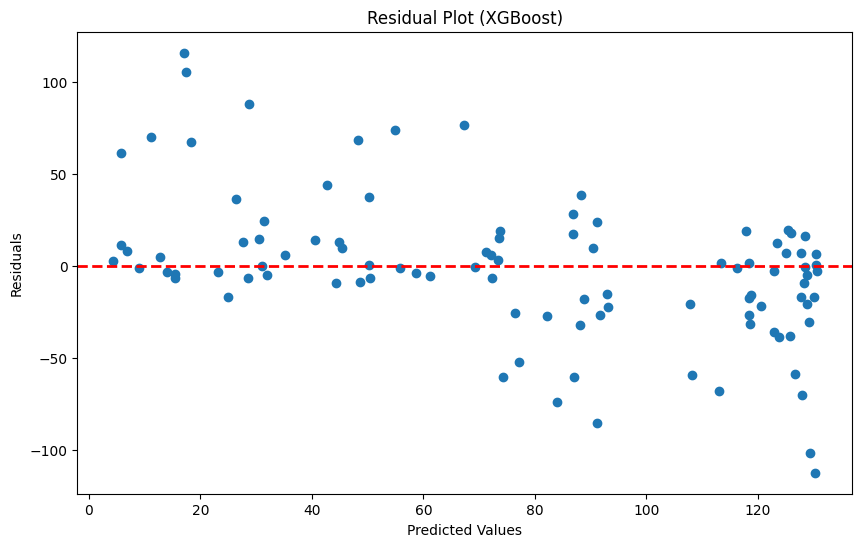

In [48]:
residuals=Y3_test-Y_pred

plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()